In [ ]:
# Import necessary libraries
import sys
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import importlib
import numpy as np
import torch
import pandas as pd
from datetime import date, timedelta

# Define the data directory relative to the current working directory
data_dir = os.path.join(os.getcwd(), "Saved_networks/")

# Append the parent directory to the system path
# Assuming `War_peace_functions_class_based.py` is in the parent directory
parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)
sys.path.append(os.path.abspath("../Fig_1"))
sys.path.append(os.path.abspath("../.."))

# Now you can import the module
from CaseDataPlotters import *
import tango_model as tango_model
importlib.reload(tango_model)
from tango_model import *


In [2]:
N   = 170000
p   = 0.48
ub  = 300
outbreak_size_arr = np.genfromtxt(f'outbreak_size_arr_N={N:.1e}_p={p}_ub={ub}_TIs=sigmoid.csv', delimiter=',', skip_header=1)
time_deltas = np.unique(outbreak_size_arr[:,0])


In [3]:
means = np.zeros_like(time_deltas)
stds  = np.zeros_like(time_deltas)
for i,delta in enumerate(time_deltas):
    means[i]    = outbreak_size_arr[:,1][outbreak_size_arr[:,0] == delta].mean()
    stds[i]     = outbreak_size_arr[:,1][outbreak_size_arr[:,0] == delta].std()

In [4]:
# Define the earliest date (May 12)
earliest_date = date(2022, 5, 12)

In [5]:
scatterx_sim = []
for i,delta in enumerate(time_deltas):
    scatterx_sim.append(earliest_date + timedelta(days=int(delta))) 
pop_size            = 6e6*(N/85000)
factor              = pop_size/1e6
scattery_sim        = means/factor
scattery_sim_err    = stds/factor

In [6]:
# plt.errorbar(scatterx_sim,scattery_sim,scattery_sim_err,color = "orange",linestyle = None,marker = ".",markersize = 20)
# plt.xlabel("Outbreak size of epidemic")
# plt.ylabel("Date of reaching 1 case per million")

In [7]:
outbreak_size = FindCumulativeCasesAsOf('2023-01-01',per_million=True)
dates = FindDateReachingThreshold(data,1,per_million=True,interpolate=False)
countries = []
# countries += ['Europe']
countries += ['Germany']
countries += ['France']
countries += ['The United Kingdom']
countries += ['Spain']
countries += ['Netherlands']
countries += ['Belgium']
countries += ['Sweden']
# countries += ['Finland']
# countries += ['Norway']
# countries += ['Ireland']
# countries += ['Portugal']
countries += ['Italy']
countries += ['Denmark']
# countries += ['Switzerland']
# countries += ['Luxembourg']
# countries += ['The United States']
# countries   += ["Poland"]
# countries      += ["Greece"]


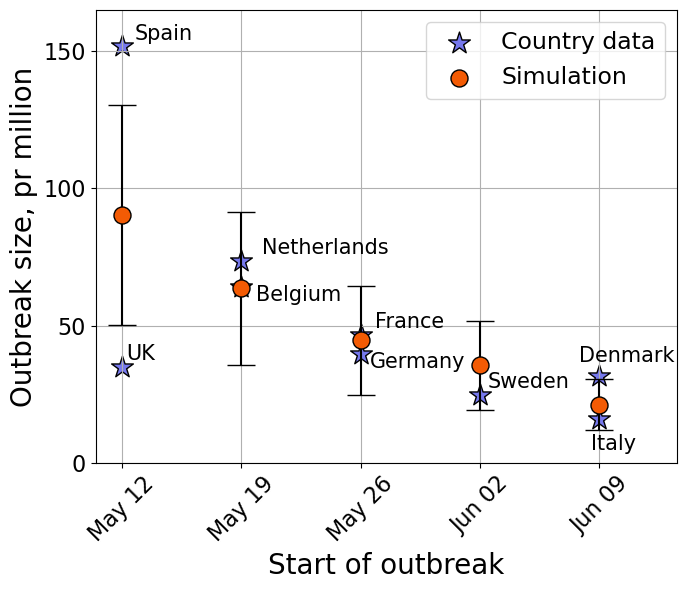

In [8]:
scatter_x = []
scatter_y = []
labels = []

for country in countries:
    date_reached = dates.get(country)
    cumulative_cases = outbreak_size.get(country)
    
    if date_reached is not None and cumulative_cases is not None:
        scatter_x.append(date_reached)
        scatter_y.append(cumulative_cases)
        if country == "The United Kingdom":
            labels.append("UK")
        else:
            labels.append(country)

plt.figure(figsize=(7, 6))
plt.scatter(scatter_x, scatter_y,s = 270,c="#7678ed",edgecolors = "k",label = "Country data",marker = "*",zorder = 1)
plt.errorbar(scatterx_sim, scattery_sim,scattery_sim_err,c="k",linestyle = "",zorder = 2,capsize = 10)
plt.scatter(scatterx_sim, scattery_sim,s = 150,c="#f35b04",edgecolors = "k",label = "Simulation",marker = "o",zorder = 3)
plt.scatter(scatterx_sim[-1] + timedelta(days = 3), 1,s = 0) #To make whitespace on the right side


list = [] #Lists of shift of country label
for i,label in enumerate(labels):
    namelength = len(label)
    if label == "Belgium" or label == "Germany":
        list.append((7*namelength**(0.9)+1,-10))
    elif label == "Denmark":
        list.append((20,10))
    elif label == "Italy":
        list.append((10,-22))
    else:
        list.append((7*namelength**(0.9),5))

#list[5] = (0,-14)
#list[0] = (0,-14)
#list[8] = (0,-14)
#list[6] = (0,-14)
# Annotate points with country names
for i, label in enumerate(labels):
    plt.annotate(label, (scatter_x[i], scatter_y[i]), textcoords="offset points", xytext=list[i], ha='center',fontsize = 15,zorder = 4)

# Format the x-axis as dates and set grid spacing
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))  # Format dates on x-axis
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=7))  # Set tick interval to 7 days (weekly)
plt.xlabel('Start of outbreak',fontsize = 20)
plt.ylabel('Outbreak size, pr million',fontsize = 20)
plt.legend(fontsize = 17)

plt.xticks(rotation=45,fontsize = 16)
plt.yticks([0,50,100,150],fontsize = 16)
plt.ylim((0,165))
plt.grid(True)  # Ensure both x and y gridlines are shown

plt.tight_layout()  # Automatically adjust the layout to prevent overlapping labels
plt.show()
